# Corona Virus Study 1 ; Spread in India compared with Italy and S Korea 



##  Import Libraries 

In [1]:
# import the necessary Core  libraries
import numpy as np 
import pandas as pd 
import os

In [2]:
# Import Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import seaborn as sns
sns.set()
import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py

from pywaffle import Waffle

py.init_notebook_mode(connected=True)
import folium 
from folium import plugins
plt.style.use("fivethirtyeight")# for pretty graphs

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
#plt.rcParams['image.cmap'] = 'viridis'
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

##  Read Input files 



In [32]:
# Pivoted file 
df_pivoted = pd.read_csv('key-countries-pivoted_csv.csv')
df_EU_US = df_pivoted.copy()
df_EU_US.head()


,Date,China,US,United_Kingdom,Italy,France,Germany,Spain,Iran
0,2020-01-22,548,1,0,0,0,0,0,0
1,2020-01-23,643,1,0,0,0,0,0,0
2,2020-01-24,920,2,0,0,2,0,0,0
3,2020-01-25,1406,2,0,0,3,0,0,0
4,2020-01-26,2075,5,0,0,3,0,0,0


In [33]:
# Plot EU countries spread 
cols_keep = ['Date','United_Kingdom','Italy','France','Germany','Spain','US']

# subset df
df_EU_US = df_EU_US[cols_keep]


# get Date DF
DT_df = df_EU_US[['Date']]
DT_df  = DT_df.set_index('Date')

# Set Index to Date 
df_EU_US = df_EU_US.set_index('Date')

df_EU_US.head()


,United_Kingdom,Italy,France,Germany,Spain,US
Date,,,,,,
2020-01-22,0,0,0,0,0,1
2020-01-23,0,0,0,0,0,1
2020-01-24,0,0,2,0,0,2
2020-01-25,0,0,3,0,0,2
2020-01-26,0,0,3,0,0,5


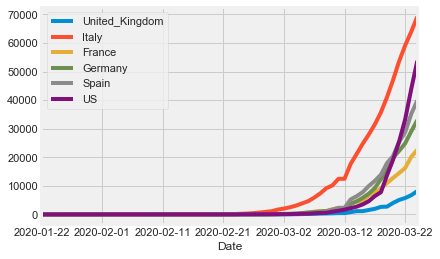

In [20]:
df_EU_US.plot();

In [34]:
# Extract Series for EU Countries and US 
s_UK      = df_EU_US['United_Kingdom']
s_Italy   = df_EU_US['Italy']
s_France  = df_EU_US['France']
s_Germany = df_EU_US['Germany']
s_Spain   = df_EU_US['Spain']
s_US      = df_EU_US['US']

In [37]:
# Extract date DF   for EU countries and US 
UK_DT_df      = DT_df[s_UK >n]
Italy_DT_df   = DT_df[s_Italy >n]
France_DT_df  = DT_df[s_France >n]
Germany_DT_df = DT_df[s_Germany >n]
Spain_DT_df   = DT_df[s_Spain >n]
US_DT_df      = DT_df[s_US >n]

In [41]:
# Create a Date column 
UK_DT_df['Date'] = UK_DT_df.index
Italy_DT_df['Date'] = Italy_DT_df.index
France_DT_df['Date'] = France_DT_df.index
Germany_DT_df['Date'] = Germany_DT_df.index
Spain_DT_df['Date']   = Spain_DT_df.index 
US_DT_df['Date']      = US_DT_df.index 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

In [42]:
# Get Series of All date DFs
UK_DT_s      = UK_DT_df['Date']
Italy_DT_s   = Italy_DT_df['Date']
France_DT_s  = France_DT_df['Date']
Germany_DT_s = Germany_DT_df['Date']
Spain_DT_s   = Spain_DT_df['Date']
US_DT_s      = US_DT_df['Date']



In [43]:
# subset each series for numbers > 100
n = 100
#-------------------------------------------------
# UK 
s_UK_GE100 = s_UK[s_UK > n] 
print('length UK ' + str(len(s_UK_GE100)))
#----------------------------------------------
# Italy
s_Italy_GE100 = s_Italy[s_Italy > n] 
print('length Italy ' + str(len(s_Italy_GE100)))
#-------------------------------------------------
# France
s_France_GE100 = s_France[s_France > n] 
print('length France ' + str(len(s_France_GE100)))
#-------------------------------------------------
# Germany
s_Germany_GE100 = s_Germany[s_Germany > n] 
print('length Germany ' + str(len(s_Germany_GE100)))
#--------------------------------------------------
# Spain
s_Spain_GE100 = s_Spain[s_Spain > n] 
print('length Spain ' + str(len(s_Spain_GE100)))
#---------------------------------------------------
# US 
s_US_GE100  = s_US[s_US>n]
print('length US ' + str(len(s_US_GE100)))


length UK 20
length Italy 31
length France 24
length Germany 24
length Spain 23
length US 22


In [44]:
# Get Number days with cases > 100 
days_UK_GE100        = len(s_UK_GE100)
days_Italy_GE100     = len(s_Italy_GE100)
days_France_GE100    = len(s_France_GE100)
days_Germany_GE100   = len(s_Germany_GE100)
days_Spain_GE100     = len(s_Spain_GE100)
days_US_GE100        = len(s_US_GE100)


# Create Dict 
dict1 = {'UK ':days_UK_GE100, 'Italy ':days_Italy_GE100,'France ':days_France_GE100,'Germany ':days_Germany_GE100,'Spain ':days_Spain_GE100,
        'US ':days_US_GE100 }

# Convert to DF 
df_totals= pd.DataFrame.from_dict(dict1,orient='index',columns=['Num Days with > 100 Cases'])
df_totals = df_totals.reset_index()

df_totals.rename(columns= {'index':'Country'},inplace= True)


In [45]:

fig = px.bar(df_totals, x='Country', y='Num Days with > 100 Cases',
             hover_data=['Num Days with > 100 Cases'], color='Num Days with > 100 Cases',
             labels={'Num Days with > 100 Cases':'Num Days with > 100 Cases'},text = 'Num Days with > 100 Cases',height=400)
fig.show()


In [187]:
#--------------------------------------
# Model US 
#--------------------------------------
# Y data 
Y = s_US_GE100
# X data 
X = np.arange(1,len(Y)+1)
Xdate = US_DT_s
# Fit 3rd Degree polynomial capture coefficients 
Z = np.polyfit(X, Y, 3)
# Generate polynomial function with these coefficients 
P = np.poly1d(Z)
# Generate X data for forecast 
XP = np.arange(1,len(Y)+8)
# Generate forecast 
YP = P(XP)
# Fit Curve
Yfit = P(X)

import datetime
start = Xdate[0]
end_dt = datetime.datetime.strptime(Xdate[len(Xdate)-1], "%Y-%m-%d")
end_date = datetime.datetime.strptime(str(end_dt),'%Y-%m-%d %H:%M:%S').date()
end_forecast_dt= end_dt + datetime.timedelta(days=7)
end_forecast =  datetime.datetime.strptime(str(end_forecast_dt),'%Y-%m-%d %H:%M:%S').date()
#
mydates = pd.date_range(start, end_forecast).to_list()
mydates_df = pd.DataFrame(mydates,columns =['Date']) 
mydates_df  = mydates_df.set_index('Date')
mydates_df['Date'] = mydates_df.index
X_FC = mydates_df['Date']

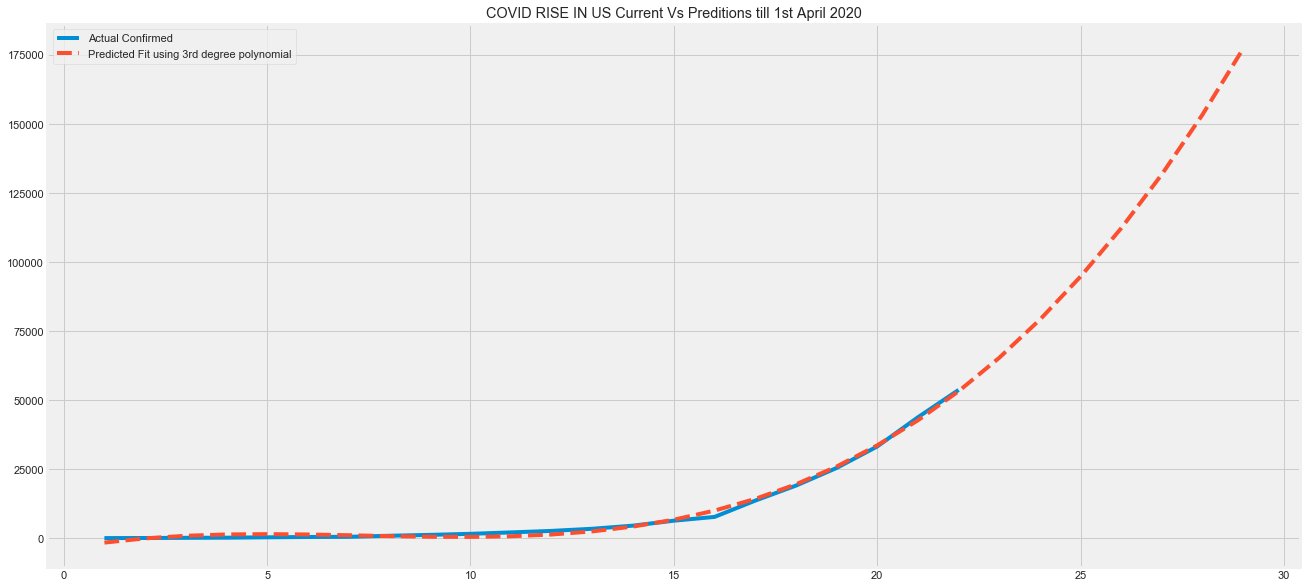

In [202]:
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)
ax.plot(X, Y, label='Actual Confirmed')
ax.plot(XP, YP, '--',label='Predicted Fit using 3rd degree polynomial')
plt.title('COVID RISE IN US Current Vs Preditions till 1st April 2020')
ax.legend()
plt.show()

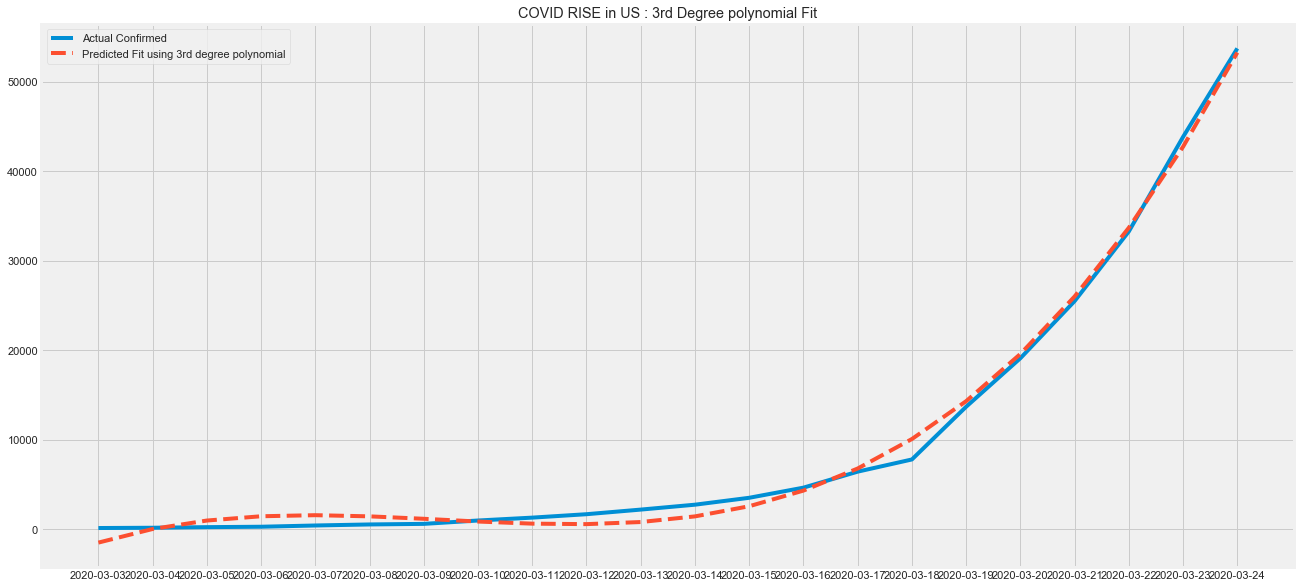

In [201]:




fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)
ax.plot(Xdate, Y, label='Actual Confirmed')
ax.plot(Xdate, Yfit, '--',label='Predicted Fit using 3rd degree polynomial')
plt.title('COVID RISE in US : 3rd Degree polynomial Fit')
ax.legend()
plt.show()

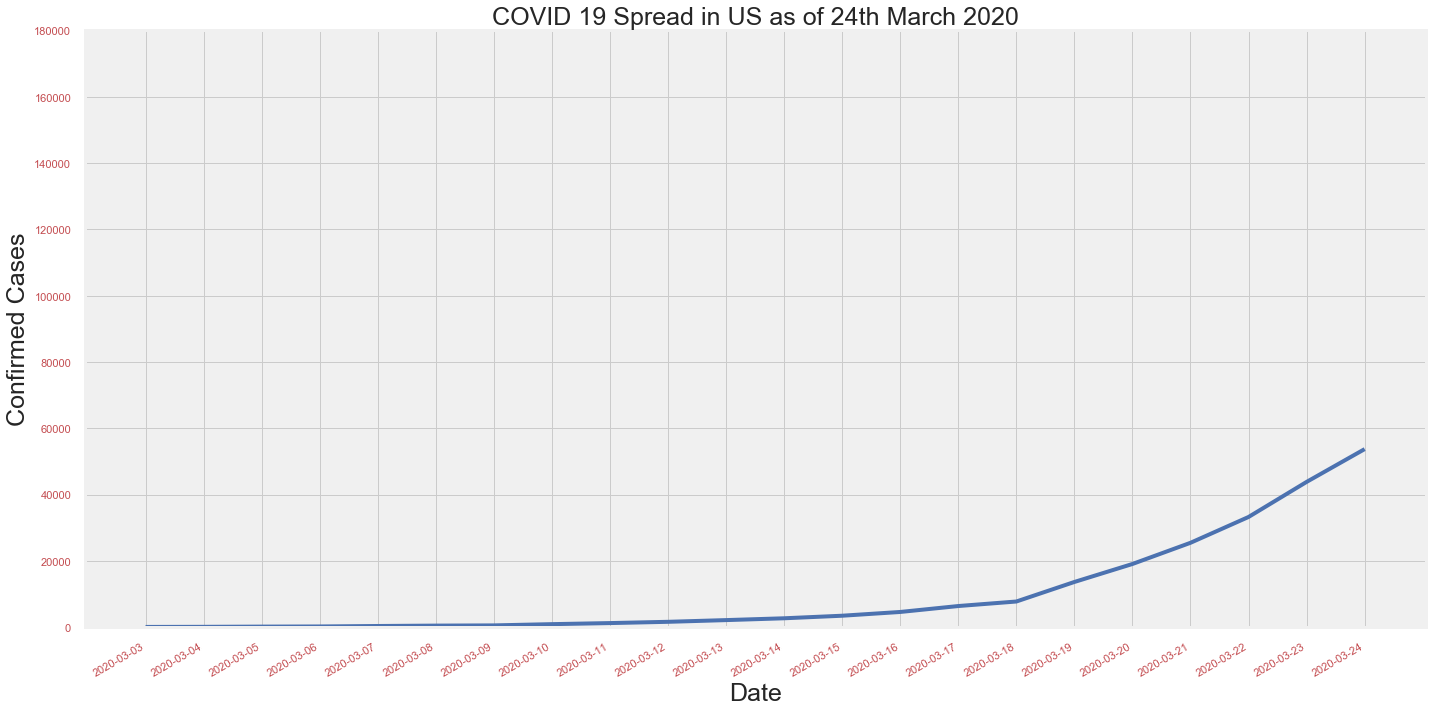

In [185]:
# Define new figure 
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(Xdate,Y,'b-')
ax.tick_params(direction='out', length=10, width=10, colors='r')
ax.set_xlabel('Date',fontsize=25)
ax.set_ylabel('Confirmed Cases',fontsize=25)
ax.set_title('COVID 19 Spread in US as of 24th March 2020',fontsize=25)
ax.set_ylim(0,180000)
fig.autofmt_xdate()

ax.grid(True)
fig.tight_layout()

plt.show()

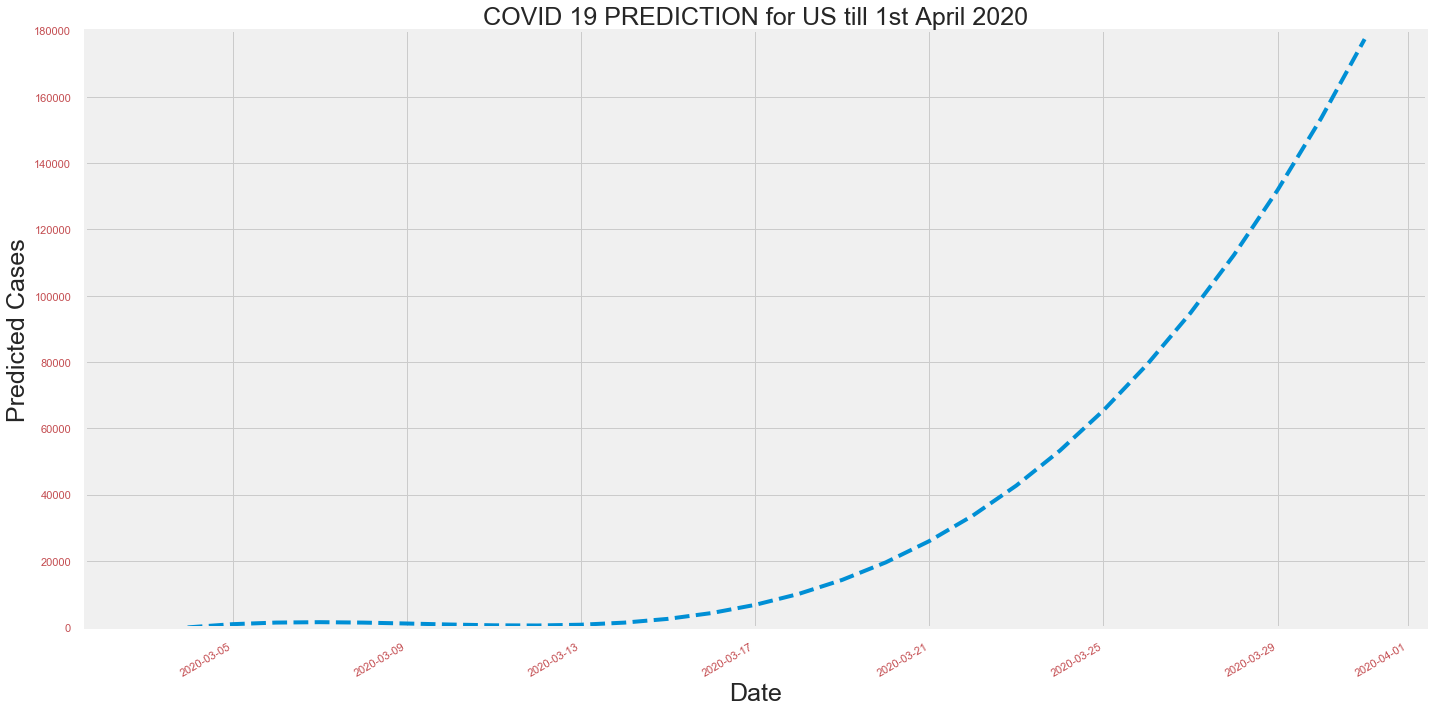

In [186]:


# Define new figure 
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(X_FC,YP,'--')
ax.tick_params(direction='out', length=10, width=10, colors='r')
ax.set_xlabel('Date',fontsize=25)
ax.set_ylabel('Predicted Cases',fontsize=25)
ax.set_ylim(0,180000)
ax.set_title('COVID 19 PREDICTION for US till 1st April 2020',fontsize=25)
fig.autofmt_xdate()

ax.grid(True)
fig.tight_layout()

plt.show()